In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from susy_tools import *
import multiprocessing as mp

In [8]:
mu = 2000
tanB = 5
m_sleptons = 2000

## Edit susy-hit input to generate spectra
changeParamValue("mu(EWSB)", mu)
changeParamValue("A_t", 3.50e3)
changeParamValue("A_tau", -250)
changeParamValue("tanbeta(MZ)", tanB)

changeParamValue("M_eL",   m_sleptons)
changeParamValue("M_eR",   m_sleptons)
changeParamValue("M_muL",  m_sleptons)
changeParamValue("M_muR",  m_sleptons)
changeParamValue("M_tauL", m_sleptons)
changeParamValue("M_tauR", m_sleptons)

optimize_higgs(125., tolerance=0.1)

(6126.68232719811, 124.782959)

In [9]:
compressed = False
points = generate_parameter_points(400, 500, 15, 15, M2_offset=0, M1_min=10)

In [6]:
compressed = True

points = []

N = 25
max_diff = 150

M1 = np.linspace(30, 500, N)

for m1 in M1:
    min_M2 = get_closestmass(m1)
    
    if min_M2 < m1:
        min_M2 = m1
        
    min_diff = get_neutralinoMassDiff(m1, min_M2)

    points.append([m1, min_M2])
    for dm in np.logspace(np.log10(min_diff/2), np.log10(max_diff), N-1):
        points.append([m1, m1 + dm])

In [10]:
compressed = True

points = []

N = 20
max_diff = 150

M2 = np.linspace(200, 500, N)

for m2 in M2:
    for dm in np.logspace(np.log10((m2-max_diff)/m2), 0, N):
        points.append([m2*dm, m2])

In [11]:
queue = run(points, True, run_prospino=False, run_micromegas=False,
            working_directory="br_dir")

Running 400 points... 


In [12]:
if queue.qsize() > 0:
    data = []
    while queue.qsize() > 0:
        ret = queue.get()
        data.append([ret[i] for i in ["m_x1", "m_x2", "cx", "gm2", "omega"]])

    m_x1, m_x2, cx, gm2, om = np.array(data).T  
    m_x1 = np.abs(m_x1)
    m_x2 = np.abs(m_x2)

In [13]:
br_Z = []
br_h = []
br_stau = []
br_emu = []
br_snu = []
br_nu = []
br_gam = []
br_x0_quarks = []
br_xpm_quarks = []
br_sleptons = []

for p in points:
    filename = "spectrum_%i_%i.dat" % (p[0], p[1])
    
    with open("./br_dir/spectra_slha/" + filename) as f:
        s = f.read()
                
    br_Z.append(np.nan_to_num(getBranchingRatio(s, "BR(~chi_20 -> ~chi_10   Z )")))
    br_h.append(np.nan_to_num(getBranchingRatio(s, "BR(~chi_20 -> ~chi_10   h )")))
    
    br_sleptons.append(getBranchingRatio(s, "BR(~chi_20 -> ~mu_L-    mu+)") + 
                  getBranchingRatio(s, "BR(~chi_20 -> ~mu_L+    mu-)") +
                  getBranchingRatio(s, "BR(~chi_20 -> ~e_L-     e+)") +
                  getBranchingRatio(s, "BR(~chi_20 -> ~e_L+     e-)") +
                  getBranchingRatio(s, "BR(~chi_20 -> ~tau_1+   tau-)") +
                  getBranchingRatio(s, "BR(~chi_20 -> ~tau_1-   tau+)") )
    
    br_emu.append(np.nan_to_num(getBranchingRatio(s, "BR(~chi_20 -> ~chi_10 e+      e-)")) + 
                  np.nan_to_num(getBranchingRatio(s, "BR(~chi_20 -> ~chi_10 mu+     mu-)")) +
                  np.nan_to_num(getBranchingRatio(s, "BR(~chi_20 -> ~chi_10 tau+    tau-)")))
    
    br_snu.append(2 * getBranchingRatio(s, "BR(~chi_20 -> ~nu_eL*   nu_e ") + 
                  2 * getBranchingRatio(s, "BR(~chi_20 -> ~nu_muL*  nu_mu ") + 
                  2 * getBranchingRatio(s, "BR(~chi_20 -> ~nu_tau1* nu_tau "))
    
    br_nu.append(np.nan_to_num(3*getBranchingRatio(s, "BR(~chi_20 -> ~chi_10 nu_eb   nu_e)")))
    
    br_x0_quarks.append(np.nan_to_num(getBranchingRatio(s, "BR(~chi_20 -> ~chi_10 ub      u)")) +
                     np.nan_to_num(getBranchingRatio(s, "BR(~chi_20 -> ~chi_10 db      d)")) +
                     np.nan_to_num(getBranchingRatio(s, "BR(~chi_20 -> ~chi_10 cb      c)")) +
                     np.nan_to_num(getBranchingRatio(s, "BR(~chi_20 -> ~chi_10 sb      s)")) +
                     np.nan_to_num(getBranchingRatio(s, "BR(~chi_20 -> ~chi_10 bb      b)")) 
                    )
    
    br_gam.append(getBranchingRatio(s, "BR(~chi_20 -> ~chi_10 gam)"))
    
    
    br_xpm_quarks.append(np.nan_to_num(getBranchingRatio(s, "BR(~chi_20 -> ~chi_1+ ub      d)")) +
                         np.nan_to_num(getBranchingRatio(s, "BR(~chi_20 -> ~chi_1- db      u)")) +
                         np.nan_to_num(getBranchingRatio(s, "BR(~chi_20 -> ~chi_1+ cb      s)")) +
                         np.nan_to_num(getBranchingRatio(s, "BR(~chi_20 -> ~chi_1- sb      c)"))
                        )

/home/duncan/UChicago/SUSY/scripts/susy_tools.py:84: UserWarning: Finding parameter BR(~chi_20 -> ~mu_L-    mu+) failed. Returning NaN.
  warnings.warn("Finding parameter %s failed. Returning NaN." % label)
/home/duncan/UChicago/SUSY/scripts/susy_tools.py:84: UserWarning: Finding parameter BR(~chi_20 -> ~mu_L+    mu-) failed. Returning NaN.
  warnings.warn("Finding parameter %s failed. Returning NaN." % label)
/home/duncan/UChicago/SUSY/scripts/susy_tools.py:84: UserWarning: Finding parameter BR(~chi_20 -> ~e_L-     e+) failed. Returning NaN.
  warnings.warn("Finding parameter %s failed. Returning NaN." % label)
/home/duncan/UChicago/SUSY/scripts/susy_tools.py:84: UserWarning: Finding parameter BR(~chi_20 -> ~e_L+     e-) failed. Returning NaN.
  warnings.warn("Finding parameter %s failed. Returning NaN." % label)
/home/duncan/UChicago/SUSY/scripts/susy_tools.py:84: UserWarning: Finding parameter BR(~chi_20 -> ~tau_1+   tau-) failed. Returning NaN.
  warnings.warn("Finding parameter %s

In [14]:
def plot_z_h(x, compressed=False):
    if not compressed:
        plt.plot(x, x-92.)
        plt.plot(x, x-125.)
    else:
        plt.plot(x, len(x)*[92.])
        plt.plot(x, len(x)*[125.])

In [15]:
bz = np.array(br_Z)
bh = np.array(br_h)

bz[np.isnan(bz)] = 0
bh[np.isnan(bh)] = 0
br_hz = bz + bh

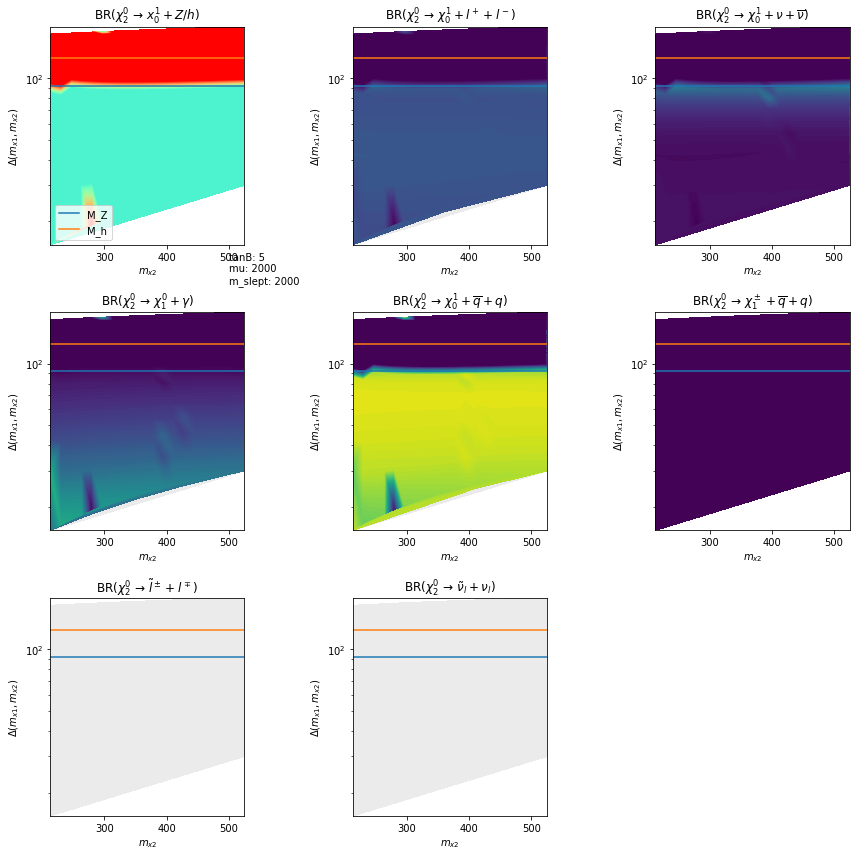

In [16]:
h_cmap = truncate_colormap(plt.get_cmap("rainbow"), 0.4, 1)
z_cmap = truncate_colormap(plt.get_cmap("PRGn_r"), 0.4, 1)

levels = np.linspace(0, 1.001, 100)

f = plt.figure(figsize=(12,12))

if compressed:
    y = m_x2 - m_x1
else:
    y = m_x1
    
    
br_rat = [br_hz,  br_emu, br_nu, br_gam, br_x0_quarks, br_xpm_quarks, br_sleptons, br_snu]
cmaps = [h_cmap, "viridis", "viridis", "viridis", "viridis", "viridis", "viridis", "viridis"]
names = ["$x_0^1 + Z/h$",  "$\chi_0^1 + l^+ + l^-$", r"$\chi_0^1 + \nu + \overline{\nu}$", "$\chi_1^0 + \gamma$", 
         "$\chi_0^1 + \overline{q} + q$", "$\chi_1^\pm + \overline{q} + q$", "$\~l^\pm + l^\mp$",
         r"$\~{\nu}_l + \nu_l$"]

    
for i in range(len(br_rat)):

    f.add_subplot(3, 3, i+1)

    sel = ~np.isnan(br_rat[i])
    
    br_rat_nonan = np.array(br_rat[i])
    br_rat_nonan[~sel] = 0
    
    x = np.linspace(min(m_x2), max(m_x2), 10)

    zp = plt.plot(x, len(x)*[92.])
    hp = plt.plot(x, len(x)*[125.])
    plt.tricontourf(m_x2, y, np.ones(len(y)), cmap="gray_r", alpha=0.1)

    z = np.ones(len(y))
    mi = np.argmin(m_x2**2 + y**2)
    z[mi] = -1
    
    if sum(sel) > 0:

        plt.tricontourf(m_x2, y, 
                        np.sqrt(br_rat_nonan),levels=levels, cmap=cmaps[i])

            
    lims = plt.ylim()
    xlims = plt.xlim()
    plt.fill_between([xlims[0], xlims[1]], [xlims[0] - m_sleptons, xlims[1] - m_sleptons],
                    hatch="x", color="gray", alpha=0.5)
    plt.ylim(*lims)

    plt.xlabel(r"$m_{x2}$")
    plt.ylabel(r"$\Delta(m_{x1}, m_{x2})$")
    plt.title(r"BR$(\chi_2^0\  \to $ % s)" % names[i])
    plt.yscale("log")
    
    if i == 0:

        plt.legend([zp[0], hp[0]],["M_Z", "M_h"])
        plt.text(500, 10, "tanB: %i\nmu: %i\nm_slept: %i" % (tanB, mu, m_sleptons))

plt.tight_layout()

In [196]:
br_rat_nonan = np.array(br_rat)
br_rat_nonan[np.isnan(br_rat_nonan)] = 0
tot = np.sum(br_rat_nonan, axis=0)

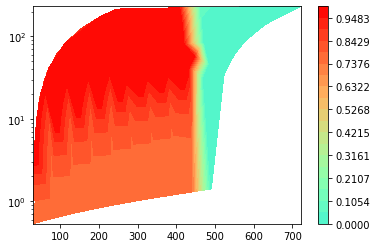

In [152]:
plt.tricontourf(m_x2, y, 
                tot,levels=np.linspace(0, 1.001, 20), cmap=cmaps[0])
plt.colorbar()
plt.yscale("log")

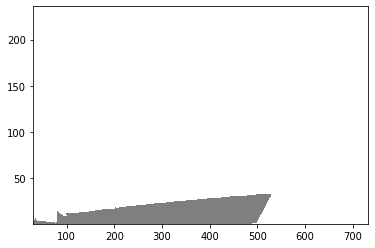

In [134]:
M_diff = np.array(points).T[1] - np.array(points).T[0]



In [125]:
M_diff

array([ -2.48017241,   0.5326496 ,   1.11754535,   2.34470766,
         4.9194013 ,  10.32133325,  21.6550579 ,  45.43420132,
        95.32491943, 200.        ,  -7.27118675,   0.6218337 ,
         1.27965743,   2.63337792,   5.41916853,  11.15198368,
        22.94941359,  47.2270763 ,  97.18752626, 200.        ,
       -11.3730613 ,   0.711842  ,   1.44033796,   2.91437347,
         5.89693042,  11.931823  ,  24.14279799,  48.8504309 ,
        98.84374629, 200.        , -14.98935023,   0.803668  ,
         1.60166189,   3.19201561,   6.36149472,  12.67807556,
        25.26664048,  50.35489165, 100.35426413, 200.        ,
       -18.22722913,   0.89751   ,   1.76416066,   3.46766369,
         6.81609773,  13.39783565,  26.33500974,  51.76453544,
       101.7492363 , 200.        , -21.15557555,   0.993778  ,
         1.92866569,   3.74304055,   7.26427221,  14.09807079,
        27.36070377,  53.10003915, 103.05342222, 200.        ,
       -23.82182812,   1.092891  ,   2.09596243,   4.01

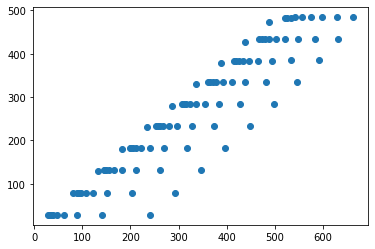

In [140]:
plt.scatter(m_x2, m_x1)

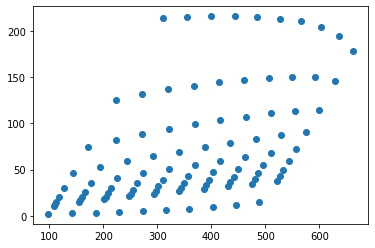

In [45]:
plt.scatter(m_x2, y)

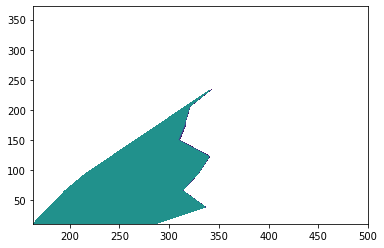

In [22]:
comb = np.array(br_h) + np.array(br_Z)
sel = ~np.isnan(comb)

plt.tricontourf(points[sel][:,1], points[sel][:,0], 
                np.array(comb)[sel],levels=np.linspace(0.99, 1.01, 100))

In [34]:
label = "BR(~chi_20 -> ~chi_10   Z )"
end = s.find(' # ' + label)
    
if end == -1:
    warnings.warn("Finding parameter %s failed. Returning NaN." % label)

else:
    start = s[:end].rfind("\n") + 2

    line = s[start:end]

    if line[0] == "#": line[0] = " "

    parind = len(line) - len(line.lstrip())
    parlen = line[parind:].find(" ")

    ind_val = len(line) - len(line[parind+parlen:].lstrip())

In [35]:
line

'    7.33361681E-02    2     1000022        23  '

In [38]:
parlen

14

In [37]:
float(line[parind:parind+parlen])

0.0733361681

In [28]:
ind_val

22

In [24]:
float(line[ind_val:])

ValueError: could not convert string to float: '2     1000022        23  '